In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
from matplotlib import rc

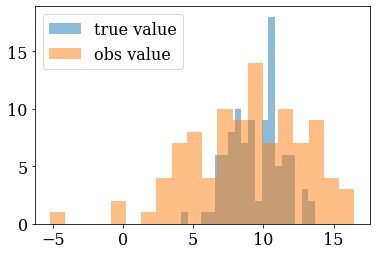

In [9]:
mu=10
sigma=2
sigma_obs=4
N=100

Xtrue=np.random.randn(N)*sigma+mu
Xobs=np.random.randn(N)*sigma_obs+Xtrue

plt.hist(Xtrue,bins=20,label='true value',alpha=0.5)
plt.hist(Xobs,bins=20,label='obs value',alpha=0.5)
plt.legend()
plt.show()

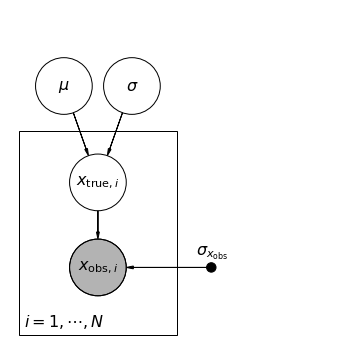

In [13]:
rc("font", family="serif", size=16)
import daft
pgm = daft.PGM([3,3], grid_unit=4, node_unit=2)
# Hierarchical parameters.
pgm.add_node(daft.Node("mu", r"$\mu$", 0.7, 2.6))
pgm.add_node(daft.Node("sigma", r"$\sigma$", 1.3, 2.6))
# Add latent variables 
pgm.add_node(daft.Node("x_true", r"$x_{{\rm true},i}$", 1, 1.75))
# Data.
pgm.add_node(daft.Node("x_obs", r"$x_{{\rm obs},i}$", 1, 1, observed=True))
pgm.add_node(daft.Node("err", r"$\sigma_{x_{\rm obs}}$", 2, 1.0, fixed=True, offset=[0.4,0.4]))
# Add in the edges.
pgm.add_edge("mu", "x_true")
pgm.add_edge("sigma", "x_true")
pgm.add_edge("x_true", "x_obs")
pgm.add_edge("err", "x_obs")
# And a plate.
pgm.add_plate(daft.Plate([0.3, 0.5, 1.4, 1.7], label=r"$i = 1, \cdots, N$",
    shift=-0.1))
pgm.render()

In [11]:
model=pm.Model()
with model:
    mu=pm.Normal('mu',0,100)
    sigma=pm.HalfNormal('sigma',100)
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, sigma_obs, observed=Xobs)

with model:
    trace = pm.sample()

pm.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 2000/2000 [09:27<00:00,  3.53draws/s]
The acceptance probability does not match the target. It is 0.8835388303430812, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,8.899873,0.433404,0.028304,8.096667,9.821222,165.316959,1.001423
xtrue__0,8.469665,1.427584,0.048659,5.560067,11.068026,775.470182,0.999293
xtrue__1,8.786296,1.332550,0.043799,6.149768,11.352868,950.181058,0.999121
xtrue__2,9.377581,1.478082,0.052070,6.713126,12.638652,642.571606,1.000766
xtrue__3,9.248300,1.507299,0.050076,6.245574,12.215409,648.432476,1.001877
xtrue__4,8.782337,1.416291,0.045747,5.702534,11.302881,793.868901,1.000384
xtrue__5,8.607590,1.421861,0.042573,5.471819,11.387424,831.535847,0.999222
xtrue__6,9.264334,1.428921,0.042727,6.298330,11.966988,1029.775317,0.999578
xtrue__7,8.846353,1.451402,0.044320,5.871852,11.895485,904.900814,1.000020
xtrue__8,8.990391,1.390892,0.046212,6.231597,11.732118,924.752197,0.999012


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C61AA7B2B0>,
      dtype=object)

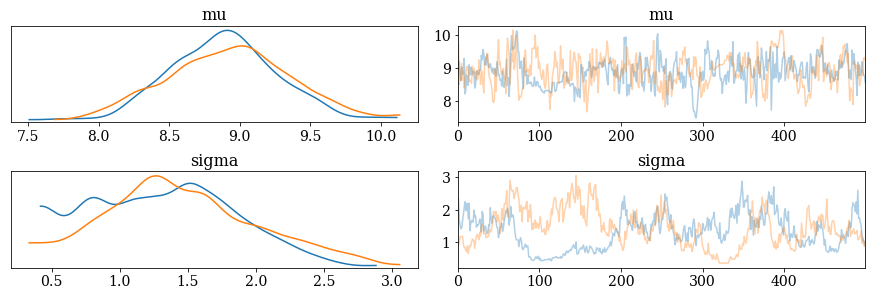

In [12]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])